In [45]:
# https://plotly.com/javascript/gapminder-example/

import pandas as pd
import csv
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt



from sqlalchemy import Integer, String, Float, Column
from sqlalchemy.orm import Session

# Imports the method used for connecting to DBs
from sqlalchemy import create_engine

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base

import sqlite3
from sqlite3 import Error


def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


if __name__ == '__main__':
    create_connection("db.sqlite")
    


2.6.0


In [46]:
engine = create_engine('sqlite:///db.sqlite')

In [47]:
# get data - life expectancy
life_expectancy_df = pd.read_csv('Life_Expectancy_Data.csv')
life_expectancy_df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [48]:
# get data - continents - https://www.kaggle.com/andradaolteanu/country-mapping-iso-continent-region
continents_df = pd.read_csv('continents2.csv')
# continents_df
# continents_df[continents_df["name"] == "United States of America" ]
continents_df

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142,34,NaN
1,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150,39,NaN
2,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2,15,NaN
3,Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2,202,17.0
4,Antigua and Barbuda,AG,ATG,28,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19,419,29.0
...,...,...,...,...,...,...,...,...,...,...,...
227,Venezuela,VE,VEN,862,ISO 3166-2:VE,Americas,Latin America and the Caribbean,South America,19,419,5.0
228,Vietnam,VN,VNM,704,ISO 3166-2:VN,Asia,South-eastern Asia,NaN,142,35,NaN
229,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142,145,NaN
230,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2,202,14.0


In [49]:
# Drop all unwanted columns
continents_df.drop(columns=['alpha-2', 'alpha-3', 'country-code', 'iso_3166-2',
        'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'], inplace=True)
continents_df

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Albania,Europe,Southern Europe
2,Algeria,Africa,Northern Africa
3,Angola,Africa,Sub-Saharan Africa
4,Antigua and Barbuda,Americas,Latin America and the Caribbean
...,...,...,...
227,Venezuela,Americas,Latin America and the Caribbean
228,Vietnam,Asia,South-eastern Asia
229,Yemen,Asia,Western Asia
230,Zambia,Africa,Sub-Saharan Africa


In [50]:
# Rename the column to country
continents_df.rename(columns={'name': 'Country'}, inplace=True)
continents_df

,Country,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Albania,Europe,Southern Europe
2,Algeria,Africa,Northern Africa
3,Angola,Africa,Sub-Saharan Africa
4,Antigua and Barbuda,Americas,Latin America and the Caribbean
...,...,...,...
227,Venezuela,Americas,Latin America and the Caribbean
228,Vietnam,Asia,South-eastern Asia
229,Yemen,Asia,Western Asia
230,Zambia,Africa,Sub-Saharan Africa


In [51]:
# Merge life_expectancy and continents dataframe
life_exp_df = pd.merge(left=life_expectancy_df, right=continents_df, how='left', left_on="Country", right_on="Country")
# life_exp_df[life_exp_df["Country"] == "United States of America" ]
life_exp_df


,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa,Sub-Saharan Africa
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa,Sub-Saharan Africa
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa,Sub-Saharan Africa
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa,Sub-Saharan Africa


In [52]:
life_exp_df['Year'].isnull().values.any()

False

In [53]:
life_exp_df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa,Sub-Saharan Africa
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa,Sub-Saharan Africa
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa,Sub-Saharan Africa
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa,Sub-Saharan Africa


In [54]:
life_exp_df[life_exp_df['Year'].isna()]

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region


In [55]:
clean_life_exp_df = life_exp_df[life_exp_df['Year'].notna()]

In [56]:
clean_life_exp_df[clean_life_exp_df['Year'].isna()]

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region


In [57]:
pd.options.display.max_columns = None
clean_life_exp_df


,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa,Sub-Saharan Africa
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa,Sub-Saharan Africa
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa,Sub-Saharan Africa
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa,Sub-Saharan Africa


In [58]:
clean_life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'region', 'sub-region'],
      dtype='object')

In [59]:
table_name = 'Life'


clean_life_exp_df.to_sql(
    table_name,
    engine,
    if_exists='replace',
    index=False,
    chunksize=500,
    dtype={
        "Country": String,
        "Year": Integer,
        "Status": String,
        "Life_Expectancy": Float,
        "Adult_Mortality": Float,
        "Infant_Deaths": Float,
        "Alcohol": Float,
        "Percentage_Expenditure": Float,
        "Hepatitis_B": Float,
        "Measles": Float,
        "BMI": Float,
        "underfive_deaths": Float,
        "Polio": Float,
        "Total_expenditure": Float,
        "Diphtheria": Float,
        "Hiv_AIDS": Float,
        "GDP": Float,
        "Population": Float,
        "thinness_1To19years": Float,
        "thinness_5To9years": Float,
        "Income_composition_of_resources": Float,
        "Schooling": Float,
        "region": String,
        "sub_region": String
    }
)

In [60]:
results = engine.execute("SELECT * FROM Life")
pd.DataFrame(results).rename(columns = {0:'Country',1:'Year',2:'Status',3:'Life_Expectancy',4:'Adult_Mortality',5:'Infant_Deaths',6:'Alcohol',7:'Percentage_Expenditure',8:'Hepatitis_B',9:'Measles',10:'BMI',11:'underfive_deaths',12:'Polio',13:'Total_expenditure',14:'Diphtheria',15:'Hiv_AIDS',16:'GDP',17:'Population',18:'thinness_1To19years',19:'thinness_5To9years',20:'Income_composition_of_resources',21:'Schooling',22:'region',23:'sub_region'})

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,underfive_deaths,Polio,Total_expenditure,Diphtheria,Hiv_AIDS,GDP,Population,thinness_1To19years,thinness_5To9years,Income_composition_of_resources,Schooling,region,sub_region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31.0,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa,Sub-Saharan Africa
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998.0,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa,Sub-Saharan Africa
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304.0,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa,Sub-Saharan Africa
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529.0,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa,Sub-Saharan Africa


In [61]:
# Export to csv
clean_life_exp_df.to_csv(path_or_buf= '../data/Life.csv', sep=',', encoding='utf-8')

In [62]:
# Filter for year 2015
life_exp_2015_df = clean_life_exp_df.loc[clean_life_exp_df['Year'] == 2015]
life_exp_2015_df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia,Southern Asia
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,Europe,Southern Europe
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,Africa,Northern Africa
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Africa,Sub-Saharan Africa
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,Americas,Latin America and the Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela,2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,62.1,10,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3,Americas,Latin America and the Caribbean
2874,Vietnam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,17.5,35,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6,Asia,South-eastern Asia
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,41.3,47,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0,Asia,Western Asia
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,23.4,40,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,Africa,Sub-Saharan Africa


In [63]:
# Group by continent
life_exp_2015_df.groupby('region').mean()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
region,,,,,,,,,,,,,,,,,,,,
Africa,2015.0,62.998039,226.313725,39.666667,NaN,0.000000,74.254902,1357.098039,28.430612,57.745098,72.686275,NaN,74.176471,1.792157,1807.991529,1.071057e+07,6.736735,6.612245,0.532687,10.370833
Americas,2015.0,75.090909,123.242424,5.787879,NaN,0.000000,82.939394,18.515152,50.439394,6.757576,88.515152,NaN,87.000000,0.178788,8038.650347,9.544664e+06,2.433333,2.366667,0.734313,13.462500
Asia,2015.0,73.185106,136.127660,43.297872,0.900000,1.516588,89.500000,4214.468085,39.523404,52.638298,85.829787,8.16,89.659574,0.125532,8793.561207,1.767371e+07,6.982979,7.353191,0.712022,12.720000
Europe,2015.0,79.272973,88.567568,0.864865,7.076667,9.864195,87.655172,137.081081,54.767568,1.108108,94.081081,6.00,93.486486,0.102703,11670.127018,8.876036e+06,1.381081,1.345946,0.857143,16.128571
Oceania,2015.0,72.160000,140.000000,1.100000,8.700000,0.000000,81.000000,16.100000,60.110000,1.300000,67.000000,NaN,81.300000,0.150000,9196.756006,4.179578e+06,0.950000,0.900000,0.685400,13.610000


In [64]:
# Group by continent
grouped_2015_df = life_exp_2015_df.groupby(['region', 'Country']).mean()
grouped_2015_df

Year  Life Expectancy  Adult Mortality  \
region  Country                                                      
Africa  Algeria           2015.0             75.6             19.0   
        Angola            2015.0             52.4            335.0   
        Benin             2015.0             60.0            249.0   
        Botswana          2015.0             65.7            256.0   
        Burkina Faso      2015.0             59.9             26.0   
...                          ...              ...              ...   
Oceania Papua New Guinea  2015.0             62.9            275.0   
        Samoa             2015.0             74.0            125.0   
        Solomon Islands   2015.0             69.2            177.0   
        Tonga             2015.0             73.5            133.0   
        Vanuatu           2015.0             72.0             13.0   

                          Infant Deaths  Alcohol  Percentage Expenditure  \
region  Country                                                            
Africa  Algeria                    21.0      NaN                     0.0   
        Angola                     66.0      NaN                     0.0   
        Benin                      25.0      NaN                     0.0   
        Botswana                    2.0      NaN                     0.0   
        Burkina Faso               38.0      NaN                     0.0   
...                                 ...      ...                     ...   
Oceania Papua New Guinea           10.0      NaN                     0.0   
        Samoa                       0.0      NaN                     0.0   
        Solomon Islands             0.0      NaN                     0.0   
        Tonga                       0.0      NaN                     0.0   
        Vanuatu                     0.0      NaN                     0.0   

                          Hepatitis B  Measles   BMI  under-five deaths  \
region  Country                                                           
Africa  Algeria                  95.0     63.0  59.5               24.0   
        Angola                   64.0    118.0  23.3               98.0   
        Benin                    82.0     55.0  25.7               39.0   
        Botswana                 95.0      0.0  37.9                2.0   
        Burkina Faso             91.0     99.0  19.4               61.0   
...                               ...      ...   ...                ...   
Oceania Papua New Guinea         67.0     38.0  48.6               12.0   
        Samoa                    59.0      0.0  74.7                0.0   
        Solomon Islands          98.0      0.0   5.5                0.0   
        Tonga                    78.0      0.0  75.2                0.0   
        Vanuatu                  64.0     39.0  53.3                0.0   

                          Polio  Total expenditure  Diphtheria  HIV/AIDS  \
region  Country                                                            
Africa  Algeria            95.0                NaN        95.0       0.1   
        Angola              7.0                NaN        64.0       1.9   
        Benin              78.0                NaN        82.0       1.0   
        Botswana           96.0                NaN        95.0       2.2   
        Burkina Faso       91.0                NaN        91.0       0.6   
...                         ...                ...         ...       ...   
Oceania Papua New Guinea   74.0                NaN        73.0       0.6   
        Samoa              61.0                NaN        66.0       0.1   
        Solomon Islands    99.0                NaN        98.0       0.1   
        Tonga               8.0                NaN        78.0       0.1   
        Vanuatu            65.0                NaN        64.0       0.1   

                                  GDP  Population   thinness  1-19 years  \
region  Country                                                            
Africa  Alg

In [65]:
# Export to csv
life_exp_2015_df.to_csv(path_or_buf= '../data/Life_2015.csv', sep=',', encoding='utf-8')

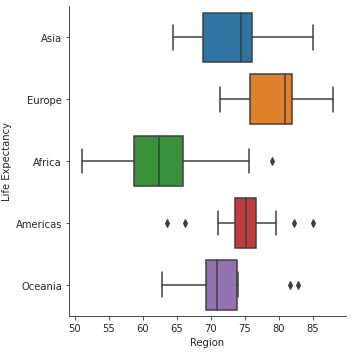

In [66]:
# Box plot using seaborn
with sns.axes_style(style='ticks'):
    g = sns.catplot(y='region', x='Life Expectancy', data=life_exp_2015_df, kind='box', orient='h')
    g.set_axis_labels('Region', 'Life Expectancy')
    # Save the image
    plt.savefig('../static/Images/RegionBoxplot.png')